In [1]:
import numpy as np
from tqdm import tqdm
from glob import glob
from utils import data as ud
from utils import analysis as ua
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def show_arpes(arpes):
    data = arpes['data']
    ax0 = arpes['ax0']
    ax1 = arpes['ax1']
    
    # TODO Is this a forever-constant?
    ax0 = 16.89 - ax0
    extent = [ax1[0], ax1[-1], ax0[-1], ax0[0]]
    
    plt.imshow(data, extent = extent, aspect = 'auto')
    plt.colorbar()

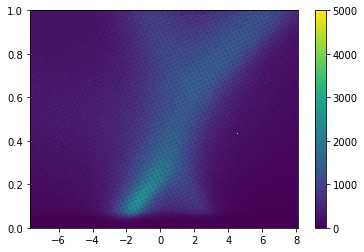

In [3]:
path = 'data/ARPES0022.txt'
arpes = ud.read_arpes(path)

# Bring down the 
ids = arpes['data'] > 5000
arpes['data'][ids] = 5000
show_arpes(arpes)
plt.ylim([0, 1])
plt.clim(0, 5000)

In [4]:
Ekins = arpes['ax0']
Eb = 16.89 - arpes['ax0']

# Select the range
Eb_min = 0.25
Eb_max = 0.6
ids = (Eb > Eb_min) & (Eb < Eb_max)
ids = np.where(ids)[0]

 47%|████▋     | 102/218 [00:07<00:07, 15.43it/s]/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 218/218 [00:15<00:00, 13.88it/s]


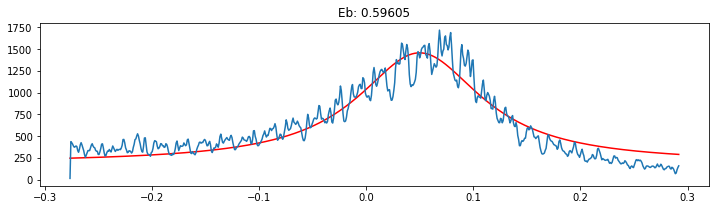

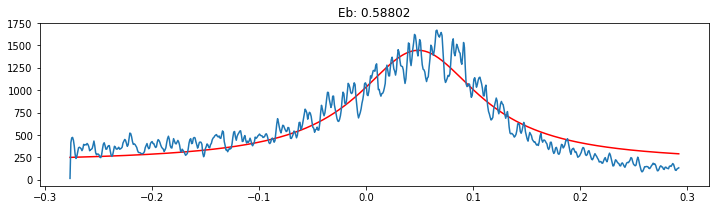

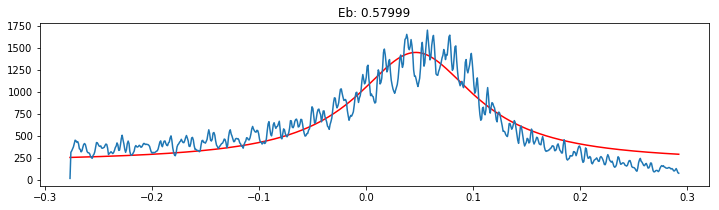

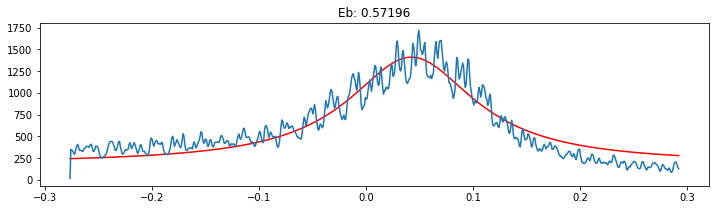

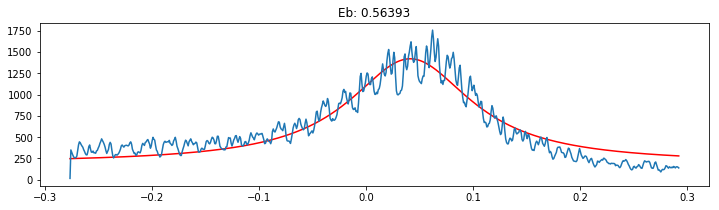

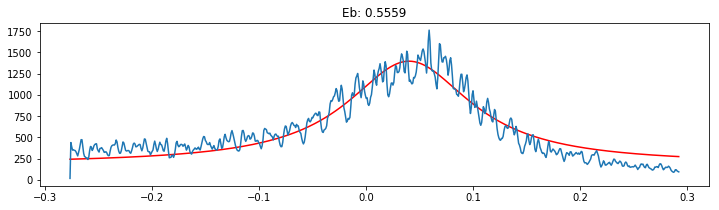

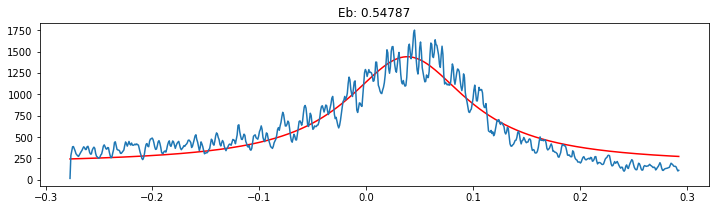

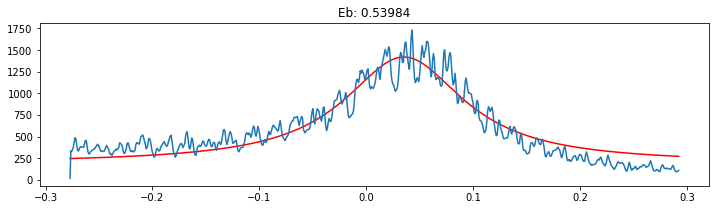

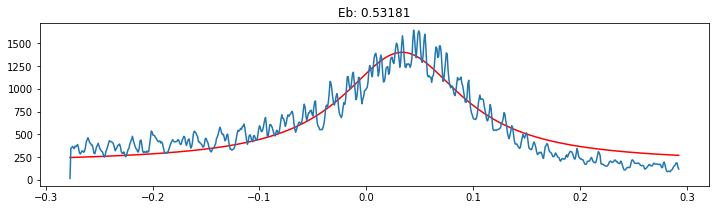

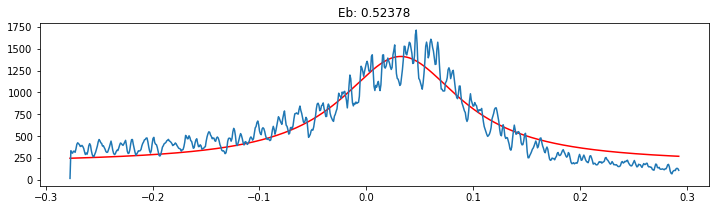

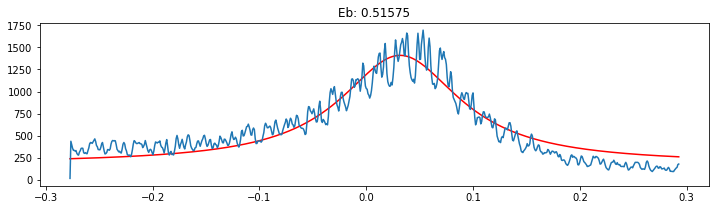

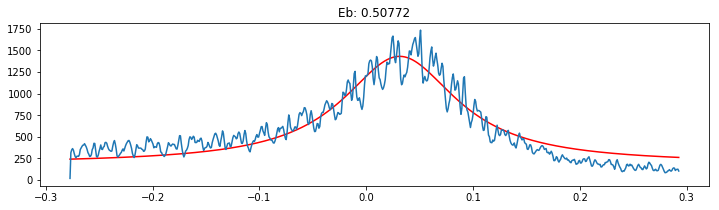

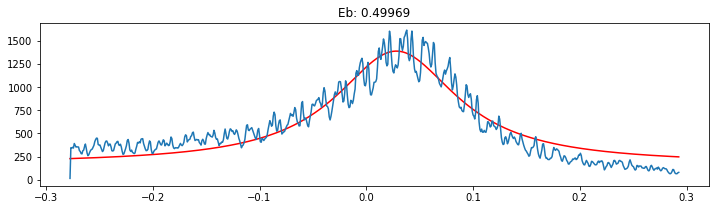

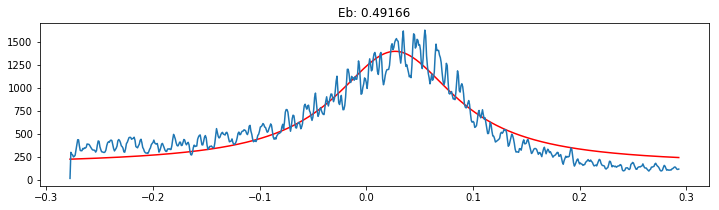

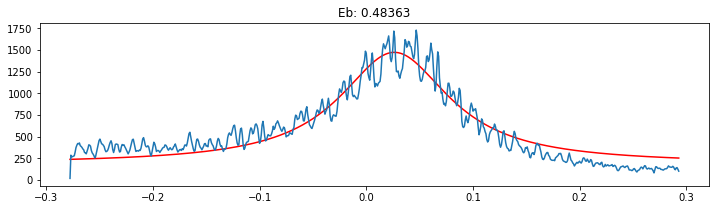

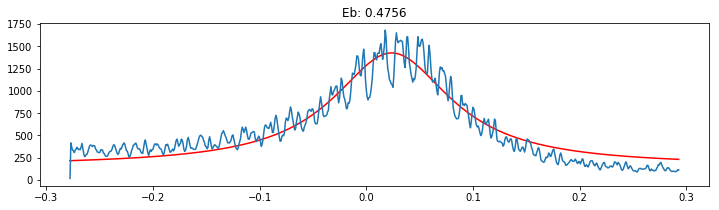

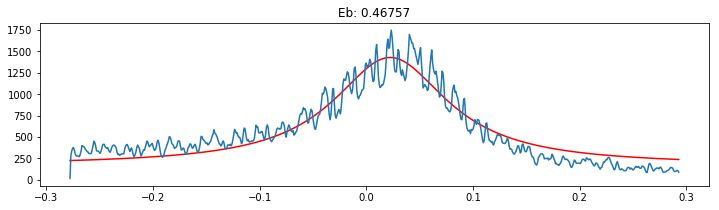

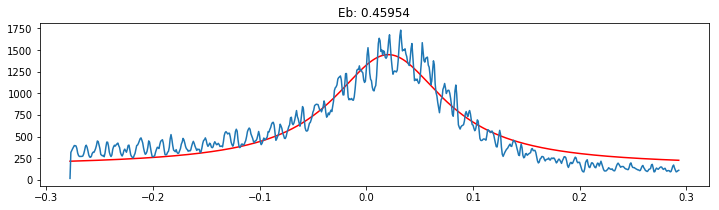

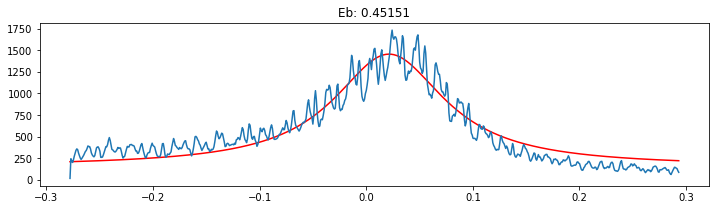

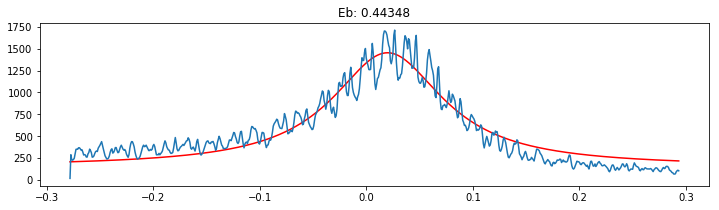

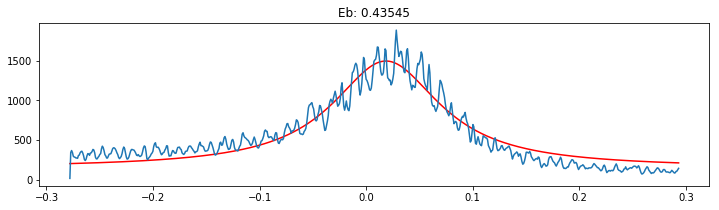

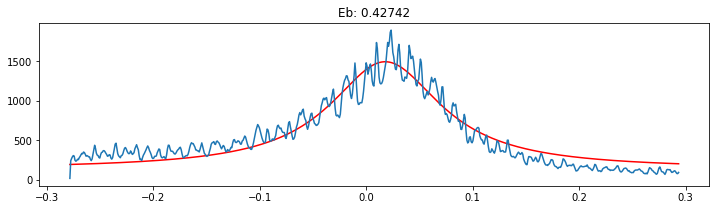

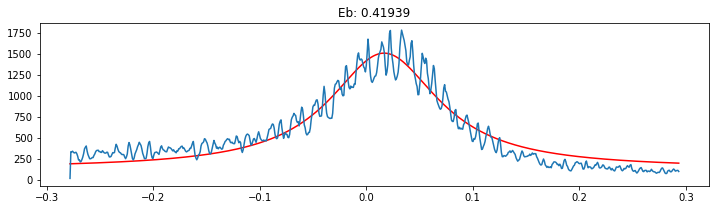

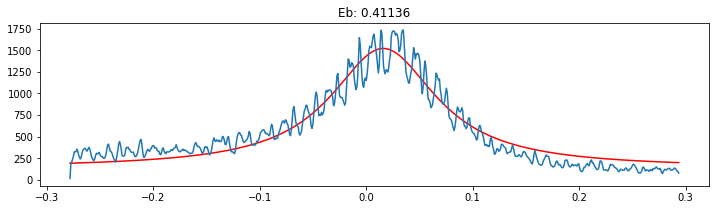

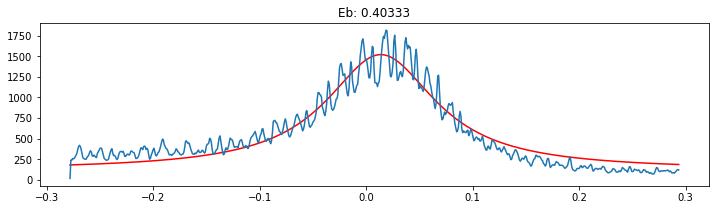

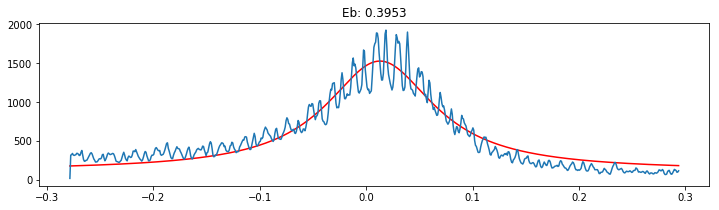

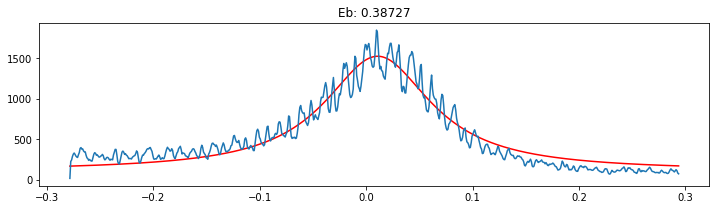

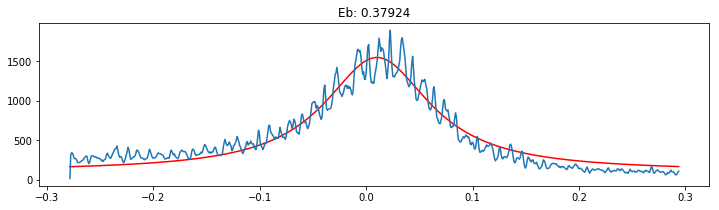

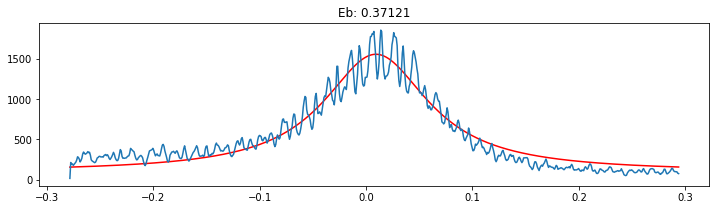

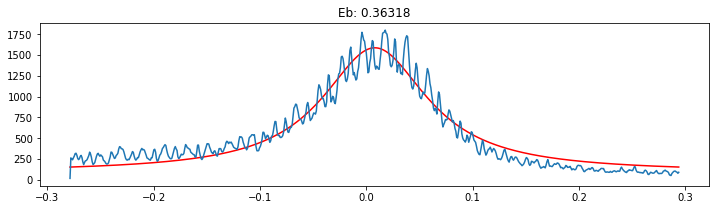

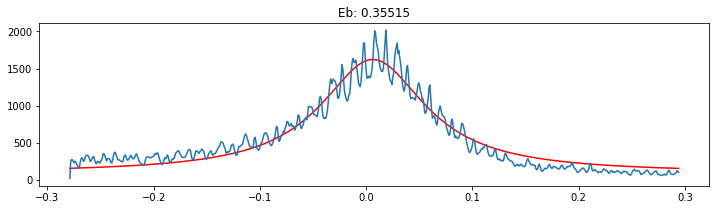

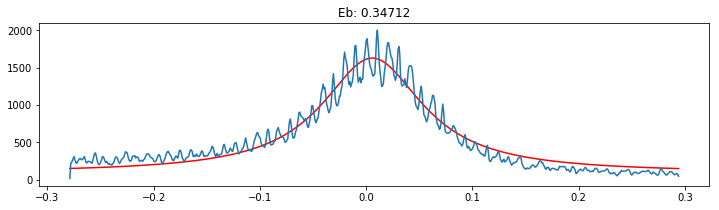

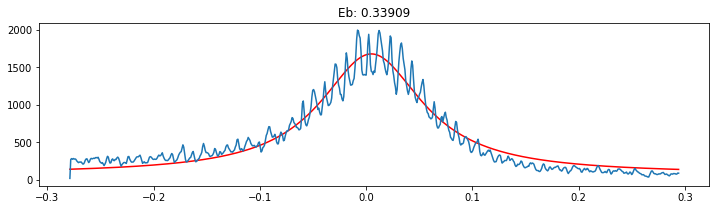

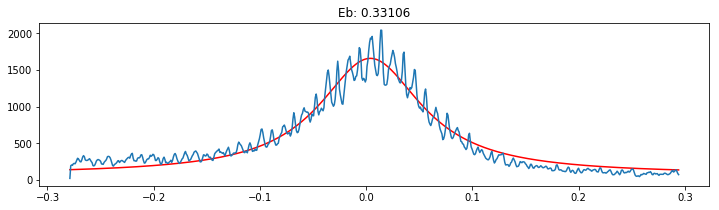

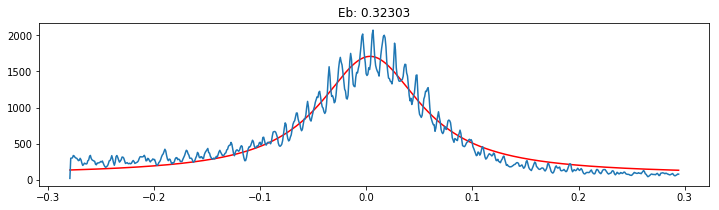

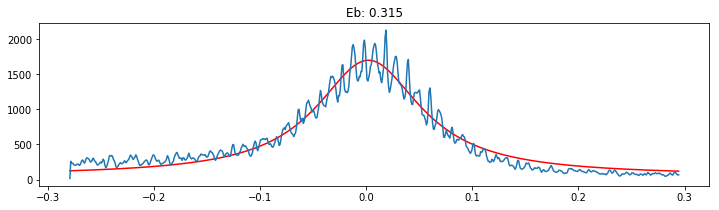

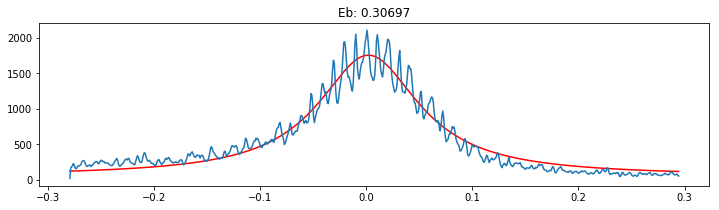

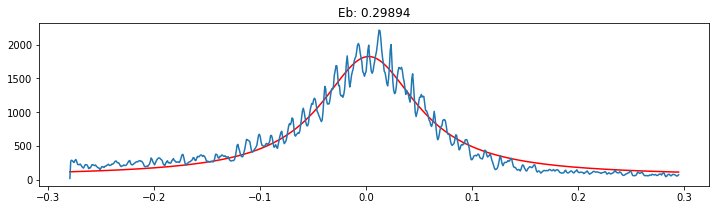

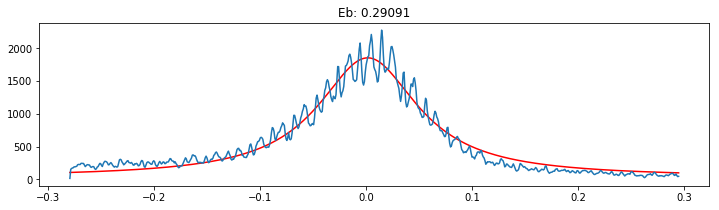

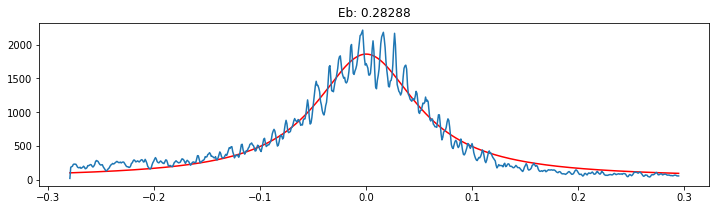

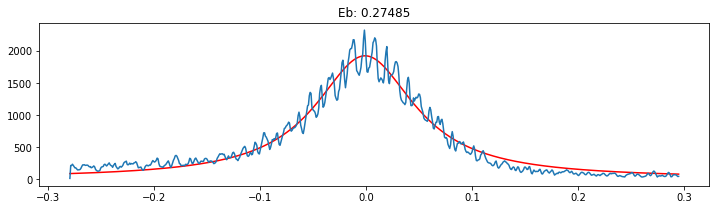

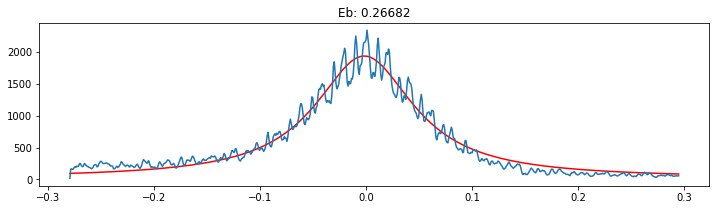

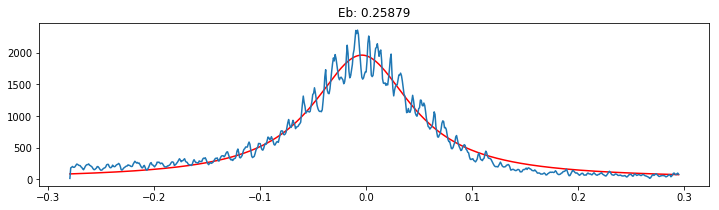

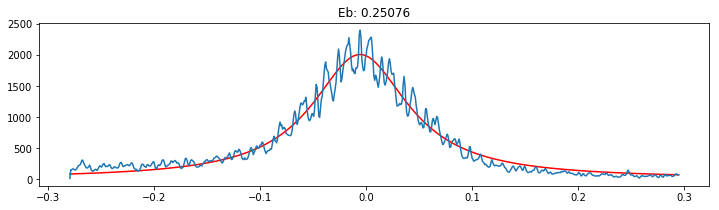

In [5]:
scores = []
costs = []
for it in tqdm(ids):
    k, score = ua.fit_function(arpes, it)
    scores.append(score)
    costs.append(score.cost)
    # if score.cost > 3e7: continue
    if it % 5 == 0:
        plt.figure(figsize = [12, 3])
        plt.title('Eb: {}'.format(Eb[it]))
        plt.plot(k, ua.lorentzian(k, score.x), c='r')
        plt.plot(k, arpes['data'][it][:-1])

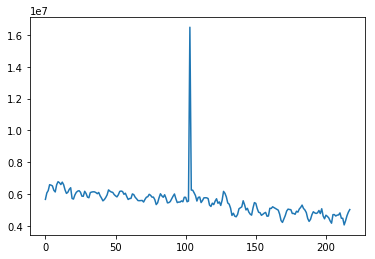

In [6]:
plt.plot(costs)

In [7]:
w1 = []
cost = []
for score in scores:
    w1.append(score.x[2])
    cost.append(score.cost)

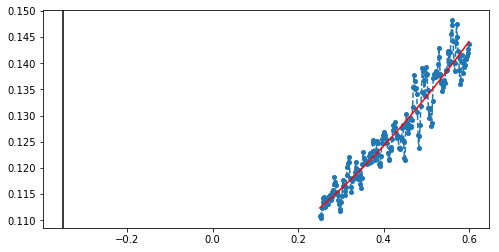

Parabola minimum: -0.349372845256, 0.09117573451


In [8]:
plt.figure(figsize = [8, 4])
plt.plot(Eb[ids], w1, '--o', ms = 4)

z = np.polyfit(Eb[ids], w1, 2)
p = np.poly1d(z)
plt.plot(Eb[ids], p(Eb[ids]), c='r')

# -b/2a
x_min = -z[1]/(2*z[0])
plt.axvline(x = x_min, c = 'k')
plt.show()

print 'Parabola minimum: {}, {}'.format(x_min, p(x_min))